# Final Project - S&P500 Price index Prediction

**Submitted by -**: Mahlet Melese

## Introduction

#### The project's domain background
The finance sector is a fascinating field to explore the power of machine learning and its application is well researched and documented. This field is often associated with high monetary compensations which is attractive to many of us to try our hands on applying the knowledge of mathematical and statistical models, and to mine patterns in stock movements so that we can make predictions and have a competitive edge over other traders. Today, there are many trade brokers taking advantage of high-frequency financial data and electronic trading tools that are built on the foundations of machine learning. These high-frequency traders are often characterized by high speed, high turn-over rates and high order-to-trade ratios and are slowly replacing the traditional traders (Aldridge I., 2013). And indicators of buy and sell opportunities are often built on only information of historical price and volume, rather than traditional valuation of a company. Since my current knowledge does not allow myself to carry out meaningful analysis of a company’s value and subsequently perform valuation of its stock, it was found that this method of stock price prediction to be a highly suitable area to study. The data was collected from “Yahoo! Finance”. Datasets of historical data of S&Pstock index price from “Yahoo! Finance” typically has the following structure: Date, Open, High, Low, Close, AdjClose, Volume, Dividends and Stock Splits. However, upon inspection the volume feature was found to be loosely recorded which made this feature particularly unreliable and impractical for analysis. The S&P500 is a stock market index that measures the stock performance of 500 large companies listed on stock exchange in the United States. I will Create Machine learning model to predict tomorrow's S&P500 price index given historical data and back tested this model on twenty plus years of historical data. So, we can really be confident in the prediction that it is making. I have sourced data from 1927 to present which would provide this project a large enough timeframe for meaningful analysis to take place.


#### Data Sources:

The first step is importing the yfinance package, this package calls the yfinance API to download daily stocks index price. Second, we need to initialize the ticker class which enable us to download price history for a single symbol, in this project I will use the 'GSPC' symbol which is the S&P500 index. Then ,we will use history method and we pass in period equals maximum which query data from the very beginning when the index was created and then give us pandas data frame. In this data frame each row is the price on a single trading day so, non-trading days are not included. The data frame columns indicate the opening price when the market opened, the highest price during the day, the lowest price during the day, the close price when the exchange closed, and the total volume traded that day. Essentially, we are going to use these columns to predict if the stock price will go up or down tomorrow. I also have additional columns called Dividends and Stock Splits ; I am not going to use these columns because these columns are more appropriate for individual stocks not for an index price.

#### Methodology 

The workflow of the project goes as follows: I will edit this

Extract and Clean the data from Yahoo Finance Feature Engineering Train with Classification Algorithms Train with Optimized Classification Algorithms with GridSearch using TimeSeriesSplit for cross validation Train with XGBoost Classifier and Optimize with GridSearch using TimeSeriesSplit for cross validation Train with LightGBM Classifier and Optimize with GridSearch using TimeSeriesSplit for cross validation

## Data Preparation & Exploratory Data Analysis (EDA):

### Import Libraries

In [20]:
#Import Dependencies
import yfinance as yf
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score
from sklearn.preprocessing import MinMaxScaler


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import neighbors, preprocessing, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, classification_report, precision_score
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import tarfile

from pptx import Presentation 
from pptx.util import Inches
from pptx.util import Pt
import pptx
from pptx.enum.text import PP_ALIGN
from io import StringIO

#This ingores depreciation warnings, which will make the code more readable
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)

#### Part 1.Downloading S&P500 price dataset

In [2]:
# Fetch historical data for S&P500 from Yahoo Finance
sp500=yf.Ticker("^GSPC")
sp500= sp500.history(period="max")

#fig.savefig('u7.png') # saving image so we can use in ppt

# Display the Dataset 
sp500.head(10)





,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-09 00:00:00-05:00,17.500000,17.500000,17.500000,17.500000,0,0.0,0.0
1928-01-10 00:00:00-05:00,17.370001,17.370001,17.370001,17.370001,0,0.0,0.0
1928-01-11 00:00:00-05:00,17.350000,17.350000,17.350000,17.350000,0,0.0,0.0
1928-01-12 00:00:00-05:00,17.469999,17.469999,17.469999,17.469999,0,0.0,0.0


This is the first 10 rows of the dataset using the head method.Here, we can have a first look at the features and some of the values that each one takes.

#### Description for 7 Attribute 
| Columns| Description |
|:------:|-|
| INDEX |  Unique ID | 
| Date | The date of the record | 
| Open | The opening price of the day (when trading starts| 
|High| The highest trade price during the day|
|Low| The lowest trade price during the day|
|Close|The closing price for the day (when trading is finished)|
|Volume| The number of shares traded|

 **Check the dataset shape**

Knowing the amount of data we have is very important, because the quality of our analysis is depend on that.

In [3]:
# check the result
sp500.shape

(24013, 7)

#### Check the datetime index

The index column enable us to index and slice the dataframe easly.

In [4]:
# check the s&p500 index
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-07-24 00:00:00-04:00', '2023-07-25 00:00:00-04:00',
               '2023-07-26 00:00:00-04:00', '2023-07-27 00:00:00-04:00',
               '2023-07-28 00:00:00-04:00', '2023-07-31 00:00:00-04:00',
               '2023-08-01 00:00:00-04:00', '2023-08-02 00:00:00-04:00',
               '2023-08-03 00:00:00-04:00', '2023-08-04 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24013, freq=None)

 **Check data type of all columns**

Pandas.info method helps us to display the data types of all columns as a series.

In [5]:
# Check the data types
sp500.info() 


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24013 entries, 1927-12-30 00:00:00-05:00 to 2023-08-04 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          24013 non-null  float64
 1   High          24013 non-null  float64
 2   Low           24013 non-null  float64
 3   Close         24013 non-null  float64
 4   Volume        24013 non-null  int64  
 5   Dividends     24013 non-null  float64
 6   Stock Splits  24013 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.5 MB


####  Let's check if there is a missing value
I checked null values which is a fundamental part of data cleaning.

In [6]:
# recommended code 
sp500.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Sanity check, that there are indeed no null values in the dataset

#### Check duplicate value in the dataframe

In [13]:
# use duplicated function
sp500_dup = sp500.duplicated()

# check the result
sp500_dup.value_counts()

False    20157
True      3856
Name: count, dtype: int64

#### Plot the closing price aginst the index


<Axes: xlabel='Date'>

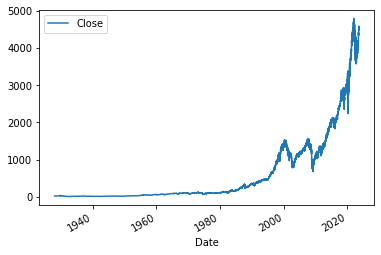

In [5]:
# plot closing price vs index

sp500.plot.line(y="Close",use_index=True)

#fig.savefig('w5.png')


This plot shows price history of S&P500 index. Based on this plot we really can regret not buying the index fund anypoint in the last few years.

### Dataset preparation

There is a lot of historical data in this data frame and usually a lot of historical data is great but with stock market data, if we go back too far the market it could shift fundamentally and some of that old data might not be useful for making future prediction. So, I will remove all data came before 1990-01-01.And I will remove Dividends and Stock Splits columns from the data frame.

In [3]:
# remove extra columns
del sp500["Dividends"]
del sp500["Stock Splits"]

In [4]:
# remove data before 1990-01-01
# use panda's loc method
# only take rows where the index is at least 1990-01-01
df = sp500.loc["1990-01-01":].copy()

In [5]:
# create column called tomorrow
# the new column going to be tomorrow's price
# use panda's shift method
# use the close column and shift all the price back one day

df["Tomorrow"] = df["Close"].shift(-1)

# show the dataframe
df

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995
...,...,...,...,...,...,...
2023-07-31 00:00:00-04:00,4584.819824,4594.220215,4573.140137,4588.959961,4503600000,4576.729980
2023-08-01 00:00:00-04:00,4578.830078,4584.620117,4567.529785,4576.729980,4042370000,4513.390137
2023-08-02 00:00:00-04:00,4550.930176,4550.930176,4505.750000,4513.390137,4270710000,4501.890137


#### Setting up the target for machine learning

This target going to be where the price goes up or down tomorrow. Some people like to predict the absolute price, but the big problem with that is our model can be extremely accurate. we might be very good in predicting the absolute price, but we can still lose money because ultimately if we are buying and selling stocks , we don't care getting accurate on the absolute price , we care more on getting accurate on the directionality i.e. if the price goes up or down. So, what am trying to do is let say on days the stock goes up ,can we actually predict it would go up? in that way if we want to buy the stock, we know we can buy it and the price will go up so our target going to be the stock up or down.

In [6]:
# set up the target, this is what we are trying to predict using machine learning
# based on tomorrow's price set up the target price
# the target: is tomorrow's price grater than tody's price

df["Target"] = (df["Tomorrow"] > df["Close"]).astype(int)

# fig.savefig('x6.png')

# show the dataframe
df

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-07-31 00:00:00-04:00,4584.819824,4594.220215,4573.140137,4588.959961,4503600000,4576.729980,0
2023-08-01 00:00:00-04:00,4578.830078,4584.620117,4567.529785,4576.729980,4042370000,4513.390137,0
2023-08-02 00:00:00-04:00,4550.930176,4550.930176,4505.750000,4513.390137,4270710000,4501.890137,0


#### Check duplicates after data preparation

In [10]:
# use duplicated function
sp500_dup = df.duplicated()

# check the result
sp500_dup.value_counts()

False    8463
Name: count, dtype: int64

In [21]:
# Brief Description of our dataset
# fig.savefig('y2.png')

df.describe()



,Open,High,Low,Close,Volume,Tomorrow,Target
count,8463.000000,8463.000000,8463.000000,8463.000000,8.463000e+03,8462.000000,8463.000000
mean,1549.033337,1558.269237,1539.167950,1549.352714,2.442614e+09,1549.493303,0.534326
std,1049.055955,1054.842049,1042.891916,1049.206437,1.852540e+09,1049.188716,0.498850
min,295.450012,301.450012,294.510010,295.459991,1.499000e+07,295.459991,0.000000
25%,889.734985,898.895020,878.924988,889.984985,6.259850e+08,890.177475,0.000000
50%,1261.890015,1269.880005,1254.180054,1261.890015,2.420510e+09,1261.940002,1.000000
75%,2009.674988,2020.659973,1995.224976,2010.835022,3.823775e+09,2011.052521,1.000000
max,4804.509766,4818.620117,4780.040039,4796.560059,1.145623e+10,4796.560059,1.000000


#### Distribution of the dataset using histogram

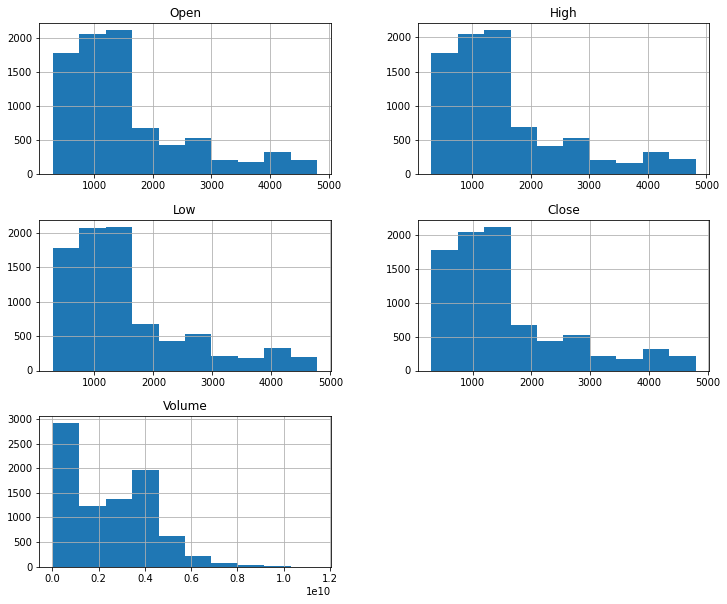

In [12]:
# plot histogram
selected_columns = ['Open','High','Low','Close','Volume']
selected_data = df[selected_columns]
selected_data.hist(figsize=(12,10));
#fig.savefig('j+.png', bbox_inches='tight') # saving image so we can use in ppt

Based on the distribution plot,we need to scale all the numerical values in dataset, before modeling.

#### Boxplot:

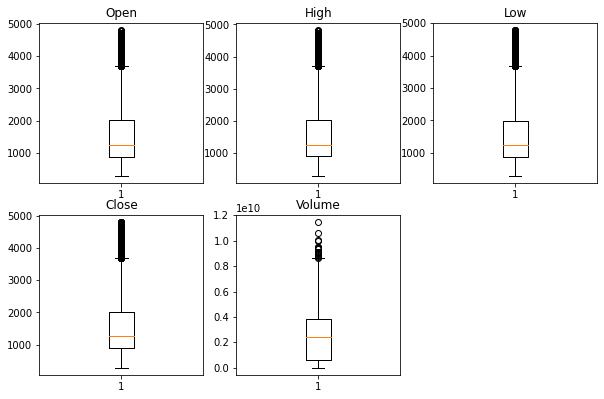

In [23]:
num_column = ['Open', 'High', 'Low', 'Close', 'Volume']

# set figure size
fig = plt.figure(figsize=(10, 10))
i = 1
for f in num_column :
    plt.subplot(3, 3, i)
    plt.boxplot(df[f], whis=1.5) # Increase the size of the box using 'whis' parameter
    plt.title(f)
    i += 1
#fig.savefig('i1.png') # saving image so we can use in ppt
plt.show()

Volume column has outliers that we will need to scale later before model training.

####  Let's look at each column individually

##### Open:

<Axes: xlabel='Open'>

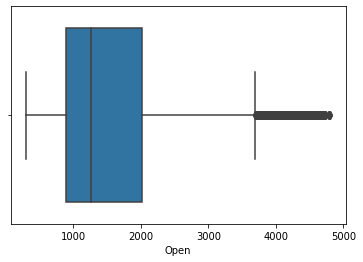

In [24]:
sns.boxplot(df.Open)
#fig.savefig('m1.png') # saving image so we can use in ppt

<Axes: xlabel='High'>

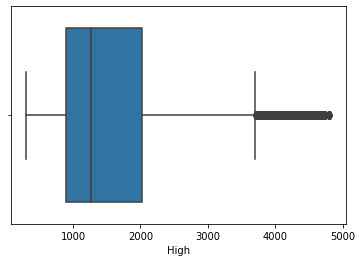

In [25]:
sns.boxplot(df.High)
#fig.savefig('b1.png') # saving image so we can use in ppt

<Axes: xlabel='Low'>

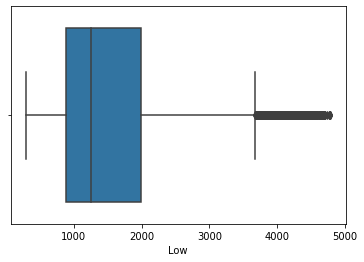

In [26]:
sns.boxplot(df.Low)
#fig.savefig('s1.png') # saving image so we can use in ppt

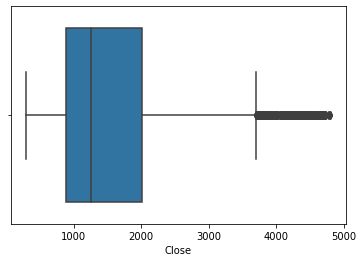

In [27]:
sns.boxplot(df.Close)
fig.savefig('k1.png') # saving image so we can use in ppt

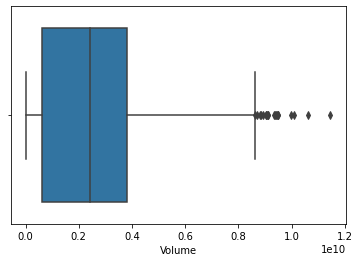

In [28]:
sns.boxplot(df.Volume)
fig.savefig('v1.png') # saving image so we can use in ppt

Volume column shows that there are outliers, and we will need to scale this later in the data preparation before modeling. 

<ipython-input-29-5ab16d79d5dc>:8: UserWarning: 'set_params()' not defined for locator of type <class 'pandas.plotting._matplotlib.converter.PandasAutoDateLocator'>
  plt.locator_params(axis='x', nbins=10)  # Adjust the number of bins to control x-axis tick frequency


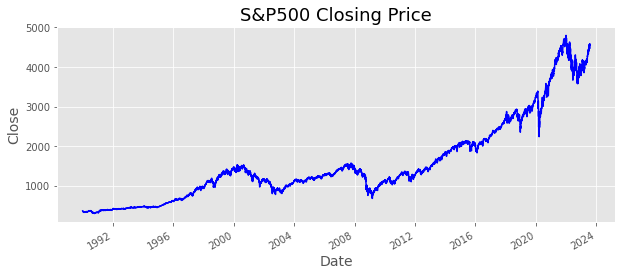

In [29]:
# Plotting close price data
plt.style.use('ggplot')
plt.figure(figsize=(10, 4))
plt.grid(True)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close', fontsize=14)
df['Close'].plot(color='blue')
plt.locator_params(axis='x', nbins=10)  # Adjust the number of bins to control x-axis tick frequency
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('S&P500 Closing Price', fontsize=18)
fig.savefig('i9.png')
plt.show()

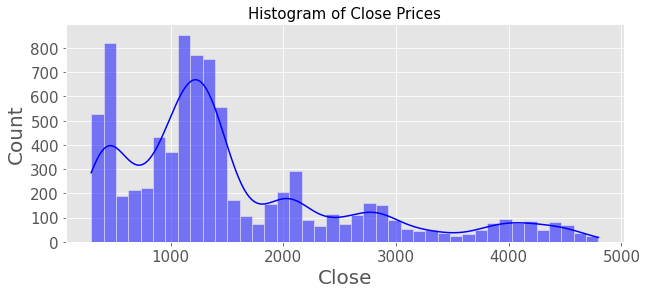

In [30]:
plt.figure(figsize=(10, 4)) 
sns.histplot(df['Close'], kde=True, color='blue')
plt.xlabel('Close', fontsize=20)
plt.xticks(fontsize = 15)
plt.ylabel('Count', fontsize=20)
plt.yticks(fontsize  = 15)
plt.title('Histogram of Close Prices', fontsize=15)
fig.savefig('e8.png')
plt.show()

This histogram plot shows the distribution of the 'Close' prices, where the x-axis represents the 'Close' price range and the y-axis represents the frequency (count) of occurrences within each price range.And this plot provides a smooth estimate of the probability density function for the 'Close' prices.And can help us understand the central tendency, spread, and potential outliers in the 'Close' prices distribution.

## Training an initial machine learning model
Now the dataset is ready so let's start train the first machine learning model. For initial model am going to use RandomForestClassifier.I love to use RandomForestClassifier as my default model for most machine earning for a few reasons: one, it works by training a bunch of individual decision trees with randomized parameters and then averaging the results from those decision trees so, because of this process it  resistant  overfitting, they can overfit but it is harder for them to overfit than it is for others models to overfit. They also run relatively quickly, and they can pick up nonlinear tendency in the data. for example, the open price is not linearly corelated with the target, so RandomForest pick up non-linear relationships and  in stock price prediction most of the relationships are non-linear.  

In [7]:
df

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-07-31 00:00:00-04:00,4584.819824,4594.220215,4573.140137,4588.959961,4503600000,4576.729980,0
2023-08-01 00:00:00-04:00,4578.830078,4584.620117,4567.529785,4576.729980,4042370000,4513.390137,0
2023-08-02 00:00:00-04:00,4550.930176,4550.930176,4505.750000,4513.390137,4270710000,4501.890137,0


#### Calculate the null error rate



In [8]:
#Null error rate
NRE = df.Target.value_counts()[1]/(df.Target.value_counts()[0] + df.Target.value_counts()[1])
Error_Rate = 1 - NRE
Error_Rate

0.4656741108354011

In [15]:
df.Target.value_counts()

Target
1    4522
0    3941
Name: count, dtype: int64

There are 3941 data points belonging to 0 and 4522 data points belonging to 1.

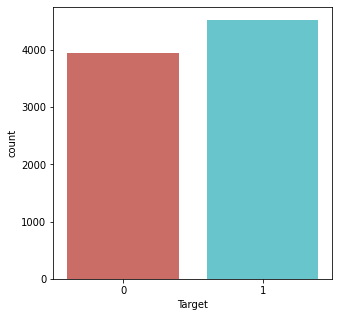

In [18]:
plt.figure(figsize=(5,5))
sns.countplot(x='Target', data=df, palette='hls')
plt.show()

- Let's  split our data into training and testing, and we are going to scale our data so they are all in the same range using the MinMaxScaler.

In [10]:
# Define the predictor columns and target column
predictors = ["Close","Volume","Open","High","Low"]

#Response and explanatory variables
X = df[predictors]
y = df.Target

In [11]:
#Prepare data for classification process
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=20)

# Initialize the MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
# Fit and transform the training data
X_train = scaler.transform(X_train)
# Transform the test data using the scaler fitted on training data
X_test= scaler.transform(X_test)

In [13]:
# Collect all kinds of scores 
Scores = []
CV_Scores = []
Accuracy = []
Precision = []
Recall = []
F1_score = []
models = [ 'Random Forest', 'SVM','DecisionTree','XG Boost Classifier', 'MLPClassifier', 'VotingClassifier']

### 1. RandomForest Classifier

In this model, a higher number of trees will reduce the variance of the model. n_estimators means the number of trees in the forest, and the default 100 n_estimators does perform well in our model. I try to vary n_estimators based on one of my references on suggestions. When the number of trees is high, it is also better for the model to learn the data, due to the imbalanced nature of the dataset, I set the weight to be balanced. Since higher max_depth may raise the risk of overfitting the training data, I set it to be 16 as some literature suggested.

In [113]:
# now initalize the model
# use n_estimators: the number of decision trees we want to train, the higher the number the better the accuracy
# min_samples_split :help us protect against over-fitting
# set random_state:if we run the same model twice, the random numbers generated will be in a predictble sequence
#model_1 = RandomForestClassifier(n_estimators=100,  random_state=42)
#model_1 = RandomForestClassifier(n_estimators=200,class_weight='balanced',  random_state=42)
#model_1 = RandomForestClassifier(n_estimators=64,class_weight='balanced',  random_state=42)
#model_1 = RandomForestClassifier(n_estimators=100,class_weight='balanced', max_depth=32,  random_state=42)
model_1= RandomForestClassifier(n_estimators = 100,min_samples_split=100,class_weight='balanced',max_depth=32,random_state =42)

In [114]:
# let's train the model using the predictor column inorder to predict the target
# use mode.fit method

model_1.fit(X_train, y_train)
model_1.score(X_train, y_train)

#Print metrics
y_train_pred = model_1.predict(X_train)

print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

p = precision_score(y_train, y_train_pred)
f = f1_score(y_train, y_train_pred)
a = metrics.accuracy_score(y_train, y_train_pred)

print("Precision:", p)
print("F1 score:", f) 
print("Accuracy:", a)

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      3150
           1       0.76      0.75      0.76      3620

    accuracy                           0.74      6770
   macro avg       0.74      0.74      0.74      6770
weighted avg       0.74      0.74      0.74      6770

[[2281  869]
 [ 887 2733]]
Precision: 0.7587451415880067
F1 score: 0.7568540570479091
Accuracy: 0.7406203840472674


#### Let's measure how accurate the model is 

This is really important piece of machine learning; we need to measure if our model is doing what we think or not. All the precision score is , when we said the market would go up(i.e the target is 1) did it actually go up so what percentage of the time when we said the market would go up, did actually go up. This is really good error metric for this particular case because am going to assume in this case we want to buy stock and when we buy stock, we want to hold that stock and sell it. And we want to make sure when we buy stock, the sock price is going to increase. Based on our goal we can adjust what error metrics is using to measure performance. In this project I will use precision, accuracy and F1 score.

#### Model Prediction and Evalution

In [115]:
# generate prediction using the model with predict method
y_preds = model.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.46      0.34      0.39       791
           1       0.53      0.65      0.58       902

    accuracy                           0.50      1693
   macro avg       0.49      0.49      0.48      1693
weighted avg       0.49      0.50      0.49      1693



In [116]:
# calculate prediction using the actuall target and the predicted target
precision_score(y_test, y_preds)

0.5274527452745275

When we said the stock price go up, it only went up by 53% of the time.

 ### 2.  DecisionTreeClassifier
- max_depth: the maximum depth of the tree
- min_samples_split: the minimum number of samples required to split an internal node

In [119]:
# train the model
model_2 =DecisionTreeClassifier(max_depth=5, min_samples_split=100)
model_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=100)

In [120]:
model_2.score(X_train, y_train)

#Print metrics
y_train_pred_1 = model_2.predict(X_train)

print(classification_report(y_train, y_train_pred_1))
print(confusion_matrix(y_train, y_train_pred_1))

p = precision_score(y_train, y_train_pred_1)
f = f1_score(y_train, y_train_pred_1)
a = metrics.accuracy_score(y_train, y_train_pred_1)

print("Precision:", p)
print("F1 score:", f) 
print("Accuracy:", a)

              precision    recall  f1-score   support

           0       0.54      0.16      0.25      3150
           1       0.55      0.88      0.67      3620

    accuracy                           0.55      6770
   macro avg       0.54      0.52      0.46      6770
weighted avg       0.54      0.55      0.48      6770

[[ 511 2639]
 [ 434 3186]]
Precision: 0.5469527896995708
F1 score: 0.6746426680783484
Accuracy: 0.5460856720827179


Here, using max depth of 5 for model 2, a test accuracy of 55% is achieved. Class 1 got F1 score which is 67% while Class 0 got an F1 score of 25.

#### Model Prediction and Evalution

In [121]:
# generate prediction using the model with predict method
y_preds_1 = model_2.predict(X_test)
print(classification_report(y_test, y_preds_1))

              precision    recall  f1-score   support

           0       0.47      0.16      0.23       791
           1       0.53      0.85      0.66       902

    accuracy                           0.52      1693
   macro avg       0.50      0.50      0.44      1693
weighted avg       0.51      0.52      0.46      1693



In [122]:
# calculate prediction using the actuall target and the predicted target
precision_score(y_test, y_preds_1)

0.5338450802512212

When we said the stock price go up, it only went up by 54% of the time.

### 3. SVM model
Since the SVM 's classification is based on choosing the hyperplane, we knew that a more flexible shape will benefit this algorithm on classification. As expected, the linear kernel performs the worst, and we tried kernel with sigmoid and rbf before poly. since logistics is one type of sigmoid function, it has a very similar performance with logistic regression. Then we also vary the kernel. So we ended with poly function. The parameter of probability comes from our debugging of ensembling models. The reason is that voting classifiers require all classifiers to estimate class probabilities, while it is not in SVC by default. We change the default value to make the ensemble model work properly. The drawback of this process is that SVC class use cross-validation to estimate class probabilities, slowing down training, and it will add a predict_proba() method.

In [117]:
#Create a svm Classifier
#svm = SVC(kernel='sigmoid', probability = True)
#svm = SVC(kernel='rbf', probability = True)
svm = SVC(kernel='poly', probability = True)
svm.fit(X_train,y_train)

SVC(kernel='poly', probability=True)

In [118]:

svm.score(X_train, y_train)

#Print metrics
y_train_pred_2 = svm.predict(X_train)

print(classification_report(y_train, y_train_pred_2))
print(confusion_matrix(y_train, y_train_pred_2))

p = precision_score(y_train, y_train_pred_2)
f = f1_score(y_train, y_train_pred_2)
a = metrics.accuracy_score(y_train, y_train_pred_2)

print("Precision:", p)
print("F1 score:", f) 
print("Accuracy:", a)

              precision    recall  f1-score   support

           0       0.60      0.00      0.00      3150
           1       0.53      1.00      0.70      3620

    accuracy                           0.53      6770
   macro avg       0.57      0.50      0.35      6770
weighted avg       0.57      0.53      0.37      6770

[[   3 3147]
 [   2 3618]]
Precision: 0.5348115299334811
F1 score: 0.6967741935483871
Accuracy: 0.5348596750369277


Support Vector Machines (SVM) is known for being relatively robust to outliers compared to some other machine learning algorithms.  Here we did get a better result and it fits my expectations.

In [123]:
# generate prediction using the model with predict method
y_preds_2 = svm.predict(X_test)
print(classification_report(y_test, y_preds_2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       791
           1       0.53      1.00      0.70       902

    accuracy                           0.53      1693
   macro avg       0.27      0.50      0.35      1693
weighted avg       0.28      0.53      0.37      1693



C:\Users\suraf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  


In [124]:
# calculate prediction using the actuall target and the predicted target
precision_score(y_test, y_preds_2)

0.5327820437093916

So far our best model is SVM model compared with both Random Forest and DecisionTree. Let's see how other models perform. 

### 4.XG BOOST

XG-boost combined the advantages from both random forest and gradient boosting, and it generally gave a prediction error lower than boosting or random forest.

On selecting XG boost hyperparameters, I mainly vary the early_stopping _rounds value. The default learning rate of 0.1 is working well in this case. Since the data set is imbalanced, we need to use balance weight hyperparameter to ensure the model perform properly.

In [21]:
# define the model
xgb_clf = xgb.XGBClassifier(weighted='balanced',random_state=42)

#Vary the stopping value for checking difference of parameters.
#xgb_clf.fit(X_train,y_train,early_stopping_rounds=5,eval_set=[(X_test, y_test)])
#xgb_clf.fit(X_train,y_train,early_stopping_rounds=10,eval_set=[(X_test, y_test)])
#xgb_clf.fit(X_train,y_train,early_stopping_rounds=20,eval_set=[(X_test, y_test)])

xgb_clf.fit(X_train, y_train, early_stopping_rounds=15, eval_set=[(X_test, y_test)])


[19:41:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "weighted" } are not used.

[0]	validation_0-logloss:0.69154
[1]	validation_0-logloss:0.69286
[2]	validation_0-logloss:0.69315
[3]	validation_0-logloss:0.69439
[4]	validation_0-logloss:0.69432
[5]	validation_0-logloss:0.69409
[6]	validation_0-logloss:0.69507
[7]	validation_0-logloss:0.69695


C:\Users\suraf\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-logloss:0.69776
[9]	validation_0-logloss:0.69800
[10]	validation_0-logloss:0.69865
[11]	validation_0-logloss:0.69954
[12]	validation_0-logloss:0.69911
[13]	validation_0-logloss:0.69933
[14]	validation_0-logloss:0.69999


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [22]:
xgb_clf.score(X_train, y_train)

#Print metrics
y_train_pred_3 = xgb_clf.predict(X_train)

print(classification_report(y_train, y_train_pred_3))
print(confusion_matrix(y_train, y_train_pred_3))

p = precision_score(y_train, y_train_pred_3)
f = f1_score(y_train, y_train_pred_3)
a = metrics.accuracy_score(y_train, y_train_pred_3)

print("Precision:", p)
print("F1 score:", f) 
print("Accuracy:", a)

              precision    recall  f1-score   support

           0       0.62      0.10      0.18      3150
           1       0.55      0.94      0.69      3620

    accuracy                           0.55      6770
   macro avg       0.58      0.52      0.44      6770
weighted avg       0.58      0.55      0.45      6770

[[ 330 2820]
 [ 201 3419]]
Precision: 0.5480044878987017
F1 score: 0.693579470534537
Accuracy: 0.5537666174298376


In [27]:
# generate prediction using the model with predict method
y_preds_4 = xgb_clf.predict(X_test)
print(classification_report(y_test, y_preds_4))

              precision    recall  f1-score   support

           0       0.53      0.09      0.16       791
           1       0.54      0.93      0.68       902

    accuracy                           0.54      1693
   macro avg       0.53      0.51      0.42      1693
weighted avg       0.53      0.54      0.44      1693



As we result showed, it actually performs a bit better than random forest,SVM and DecisionTree on almost every metric with less time spending.

- Feature importance with XGBoost. One of the many benefits of using XGBoost is that it can automatically provide estimates of feature importance from a trained
predictive model.

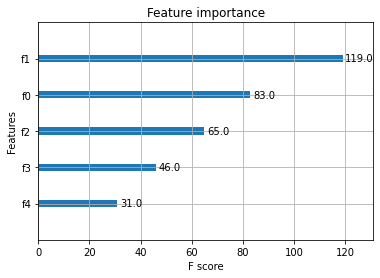

In [26]:
import matplotlib.pyplot as plt
# calculates the importance of each feature in the training data
xgb.plot_importance(xgb_clf)
plt.show()


### Please fix the code below 

In [130]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/75/dd/9afe0d9d0f61a5384c3932626a022e38c396a5d88e6f5345ad2f7b576747/xgboost-1.7.6-py3-none-win_amd64.whl.metadata
  Using cached xgboost-1.7.6-py3-none-win_amd64.whl.metadata (1.9 kB)
Using cached xgboost-1.7.6-py3-none-win_amd64.whl (70.9 MB)
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


### 5.KNN

Since KNN requires the selection of K, as we know, a small value of k means that noise will have a higher influence on the result and a large value make it computationally expensive. We choose k=3 as a start point and gradually choose other K values until reached around the square root of sample size n as our models. Since this algorithm is not computing expensive, we can directly use grid search to find the best parameter.

In [ ]:
# grid search
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

#defining grid
#train sample size is 14300, whose sqrt is 119
n_neighbor = [3,5,19,29,103,119]

#Try to use SMOTE to resample 
X1, y1  = SMOTE().fit_resample(X, y)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.8, random_state=22)

# create and fit  model, testing each parameters
from sklearn.neighbors import KNeighborsClassifier
knn_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=dict(n_neighbors=n_neighbor))
knn_grid.fit(X_train1, y_train1)
print(knn_grid)
# summarize the results of the grid search
print('Best Score: ',knn_grid.best_score_)
print('Best parameters: ',knn_grid.best_params_)

Based on testing, the accuracy of the model decreases since a large K value may reduce overfit. On the other hand, it raised the risk of overfitting. Although the best k selected by grid search is when k=3, we still determine to use k=11. Because this gave a relatively balanced result, which has a value close to k=3 with a less than 3% difference. What's more, it reduced the risk of making the model too sensitive.

In [ ]:
#KNN 
from sklearn.model_selection import train_test_split
#apply smote
from imblearn.over_sampling import SMOTE

# Here we will use MinMaxscaler to scale these numerical values.
from sklearn.preprocessing import MinMaxScaler
#MinMax subtracts the minimum value in the feature and then divides by the range
scaler = MinMaxScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

#set k=3
# try knn = KNeighborsClassifier(n_neighbors=5)
# try knn = KNeighborsClassifier(n_neighbors=113)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train1, y_train1)
cv_score = cross_val_score(estimator = knn, X = X_train1, y = y_train1, cv = 5,verbose = 1)
y_pred = knn.predict(X_test1)
print('')
print('###### KNN ######')
print('Score : %.4f' % knn.score(X_test1, y_test1))
print('cv_score : %.4f' % cv_score.mean())
print('Accuracy:', 100* accuracy_score(y_test1,y_pred))
print('Precision:', 100* precision_score(y_test1,y_pred,average='weighted')) # for imbalanced data
print('Recall:', 100* recall_score(y_test1,y_pred,average='weighted'))
print('F1-score:', 100* f1_score(y_test1,y_pred,average='weighted'))
Accuracy.append(100* accuracy_score(y_test1,y_pred))
Precision.append(100* precision_score(y_test1,y_pred,average='weighted'))
Recall.append(100* recall_score(y_test1,y_pred,average='weighted'))
F1_score.append(100* f1_score(y_test1,y_pred,average='weighted'))
CV_Scores.append(cv_score.mean())
Scores.append(knn.score(X_test1, y_test1))

In [ ]:
from sklearn.linear_model import LogisticRegression

#apply smote
from imblearn.over_sampling import SMOTE

#Start with default setting for logistic regression
#model = LogisticRegression(solver='sag', max_iter=1000)
model = LogisticRegression(solver='saga', max_iter=1000)
#train the algorithm
model.fit(X_train, y_train)
#5 fold validation
cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = model.predict(X_test)
print('')
print('###### Logistic Regression ######')
print('Score : %.4f' % model.score(X_test, y_test))
print('cv_score : %.4f' % cv_score.mean())
print('Accuracy:', 100* accuracy_score(y_test,y_pred))
print('Precision:', 100* precision_score(y_test,y_pred,average='weighted')) # for imbalanced data
print('Recall:', 100* recall_score(y_test,y_pred,average='weighted'))
print('F1-score:', 100* f1_score(y_test,y_pred,average='weighted'))
Accuracy.append(100* accuracy_score(y_test,y_pred))
Precision.append(100* precision_score(y_test,y_pred,average='weighted'))
Recall.append(100* recall_score(y_test,y_pred,average='weighted'))
F1_score.append(100* f1_score(y_test,y_pred,average='weighted'))
CV_Scores.append(cv_score.mean())
Scores.append(model.score(X_test, y_test))

### MLP

The last algorithm we used before the ensemble model is the multilayer perceptron model(MLP). And this one is based on sklearn package and as our representative of the feedforward neural network. Due to the time complexity of the neural network, we manually tested the hyperparameters instead of the grid search.

In [ ]:
from sklearn.neural_network import MLPClassifier

# Classification using Multi-layer perceptron
#we also checked other activation function(logisitic, tanh) and they did not give the same performance as relu did. 
ann = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=1000, activation='relu', solver ='adam', random_state=1)
ann = ann.fit(X_train, y_train)
y_pred = ann.predict(X_test)
cv_score = cross_val_score(estimator = ann, X = X_train, y = y_train, cv = 5,verbose = 1)
print('')
print('###### MLP ######')
print('Score : %.4f' % ann.score(X_test, y_test))
print('cv_score : %.4f' % cv_score.mean())
print('Accuracy:', 100* accuracy_score(y_test,y_pred))
print('Precision:', 100* precision_score(y_test,y_pred,average='weighted')) # for imbalanced data
print('Recall:', 100* recall_score(y_test,y_pred,average='weighted'))
print('F1-score:', 100* f1_score(y_test,y_pred,average='weighted'))
Accuracy.append(100* accuracy_score(y_test,y_pred))
Precision.append(100* precision_score(y_test,y_pred,average='weighted'))
Recall.append(100* recall_score(y_test,y_pred,average='weighted'))
F1_score.append(100* f1_score(y_test,y_pred,average='weighted'))
CV_Scores.append(cv_score.mean())
Scores.append(ann.score(X_test, y_test))

### Ensemble Model

We place our four models in an array called ‘estimators’. Then, create the voting classifier.

It takes two inputs. The first is our estimator array of our four models. A voting ensemble involves summing the predictions made by classification models or averaging the predictions made by regression models. It is also the cause to let us change parameters on the SVM model.

nitially, we set the voting parameter to hard, which tells our classifier to make predictions. After we did some research, we realized that ‘soft’ voting often achieves higher performance than hard voting because it gives more weight to highly confident votes. The major difference is that 'soft' voting ensemble involves summing the predicted probability for the label. In simple words, hard is predicting major labels, soft is predicting the largest probability.

After we applied soft voting for our model, the model does perform slightly better.

Now we can fit our ensemble model to our training data and store it on our testing data.

In [ ]:
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[('Regression Model', model), ('SVM', svm), ('KNN', knn), ('Decision Tree', rnd_clf)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='soft')
#fit model to training data
ensemble.fit(X_train, y_train)

In [ ]:
#test our model on the test data
ensemble.score(X_test, y_test)

In [ ]:
y_pred = ensemble.predict(X_test)
cv_score = cross_val_score(estimator = ensemble, X = X_train, y = y_train, cv = 5,verbose = 1)
print('')
print('###### Voting ######')
print('Score : %.4f' % ensemble.score(X_test, y_test))
print('cv_score : %.4f' % cv_score.mean())
print('Accuracy:', 100* accuracy_score(y_test,y_pred))
print('Precision:', 100* precision_score(y_test,y_pred,average='weighted')) # for imbalanced data
print('Recall:', 100* recall_score(y_test,y_pred,average='weighted'))
print('F1-score:', 100* f1_score(y_test,y_pred,average='weighted'))
Accuracy.append(100* accuracy_score(y_test,y_pred))
Precision.append(100* precision_score(y_test,y_pred,average='weighted'))
Recall.append(100* recall_score(y_test,y_pred,average='weighted'))
F1_score.append(100* f1_score(y_test,y_pred,average='weighted'))
CV_Scores.append(cv_score.mean())
Scores.append(ensemble.score(X_test, y_test))

### Model Selection

In [ ]:
compare = pd.DataFrame({'Algorithms' : models , 'Scores' : Scores, 'Cross_Val' : CV_Scores, 'Accuracy(%)':Accuracy, 'Precision(%)':Precision, 'Recall(%)':Recall, 'F1-score(%)':F1_score})
compare.sort_values(by='Scores' ,ascending=False)

#### Building a back testing system
The next step is build a more robost way to test the algorism.It help us to accuratly measure the error over long period of time.Currently, I was only able to test aginst the last 100 day's but if we really build a stock price model and we want to use it in a real world, we want to  able to test across multiple year's of data and we want to know how the algorism handle a lot of different situation that gives us more confident to work in the future.Based on  the backtest, I will use the first 10 year's of data and then predict values for the eleventh year. Then we will take the first eleveth year of data and predict values for the twelveth year of data so on. In this way we will actually get predictions for a lot of different years and be able to have more confidence in our model.After the backtest, I will actually start evaluating the errors of my prediction.

In [87]:
# create a prediction function

def predict(train,test,predictors,model):
    model.fit(train[predictors],train["Target"])
    preds=model.predict(test[predictors])
    preds=pd.Series(preds,index=test.index,name="predictions")
    combined=pd.concat([test["Target"],preds],axis=1)
    return combined

#### Backtest to check how good our model is:

In [88]:
# create backtest function
# train the model with 10 year's of data
# we will be training a model for about a year then going to the next year
# each dataframe is a prediction for a single year
# loop the data year by year

def backtest(data,model,predictors,start=2500,step=250):
    all_predictions =[]
    
    for i in range(start,data.shape[0],step):
        train=data.iloc[0:i].copy()
        test=data.iloc[i:(i+step)].copy()
        predictions=predict(train,test,predictors,model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions) # concat all the predictions together

In [90]:
# start the backtest
predictions=backtest(df,model,predictors)  

In [91]:
# see how many day's we predicted the market go up vs down
# use value_count: count how many times each type of predictions was made

prediction_counts = predictions["predictions"].value_counts()

# Print the counts
print(prediction_counts)

predictions
0    3433
1    2530
Name: count, dtype: int64


We can see, we predicted the market go down about 3433 days and go up about 2530 days.

In [51]:
# now let's check the precision score
precision_score(predictions["Target"],predictions["predictions"])

0.5296442687747036

Across all of those rows, about six thousend traiding days,we were about 53% precise. When we say the market would go up, it went up 53% of the time.

In [93]:
# check the percentage of days where the market actually went up
# use value count of the target divided by the number of rows total
predictions["Target"].value_counts()/predictions.shape[0]

Target
1    0.533959
0    0.466041
Name: count, dtype: float64

So, the S&P500 in the days we were looking at actually went up 53.6% of days and went down 46.6% of days.

#### Adding additional predictors to the model
- Add more features to the model and see if that improves the accuracy. So, I am going to give different horizons to the algorism and look at the rolling means.And calculate the mean close price in the last 2 days, the last trading week,the last 60 days ,the last year and the last four years and we will find the ratio between todays closing price and the closing price in those periods.Even more days in the rolling period alone may benefit the learners significantly.

In [96]:
# create varity of rolling averages

horizons = [2,5,60,250,1000]
new_predictors =[]

for horizon in horizons: # loop through horizons
    rolling_averages = df.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    df[ratio_column]=df["Close"]/rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    df[trend_column]=df.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors +=[ratio_column,trend_column]

In [100]:
df.head(5)

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0


The dataframe has NaN values because when pandas can not find enough days or rows prior to the current row, it actually compute the rolling average and return NaN.

In [99]:
# remove the missing values in the dataframe
df= df.dropna()
df.head(5)

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0


#### Improving the model

In [101]:
# update the model slightly and change some of the parameters
model=RandomForestClassifier(n_estimators=200,min_samples_split=50,random_state=1)

In [102]:
# rewrite the predict function slightly
def predict(train,test,predictors,model):
    model.fit(train[predictors],train["Target"])
    preds=model.predict_proba(test[predictors]) [:,1]
    preds[preds >=.6] = 1 # this will reduce the number of trading days
    preds[preds < .6]= 0
    preds=pd.Series(preds,index=test.index,name="predictions")
    combined=pd.concat([test["Target"],preds],axis=1)
    return combined

In [103]:
# run the backtest again
predictions=backtest(df,model,new_predictors)

In [104]:
# check the value count again
predictions["predictions"].value_counts()

predictions
0.0    4144
1.0     818
Name: count, dtype: int64

There were about four thousend days where it pridicted the price went down. The distribution is very different now, we can see that only a few days we predict that the price would go up that is because I change the trashhold, I ask the model to be more confident in its prediction before it actually predicted and the price go up.Which means we are actully be trading or buying stock in fewer days.

In [105]:
precision_score(predictions["Target"],predictions["predictions"])

0.5684596577017115

## Summary and next steps with the model
We can see that, when we buy a stock the model pridict the price go up and,57% of the time it will actually go up.It is actually pretty good specially given I just looking at timeserious data and just looking at historical prices of the index.
I would like to point out that neural networks were not considered for this project due to the computational demands of the algorithms. In particular, I felt that recurrent neural networks such as Long-Short Term Memory (LSTM) neural networks were the most appropriate for this project as these models were designed specifically for time-series data. Also, due to time constraints other methods of feature engineering were not explored, classic stock market indicators such as Bollinger Bands and Sharpe Ratios . To improve this model I would recommend to include exchanges that are open overnight.The S&P500 only trade during US market hours.There are other indices around the world open before the US market is open so, it might be worth looking those prices and see if we can actually correlate them, if index in the other side of the world increasing does that help predict the S&P500 better.This concludes the first stage of this project but the above mentioned room for improvements will be explored in the second stage of this project.

However, it's essential to keep in mind that predicting financial markets, including stock prices like the S&P 500, is an extremely challenging and complex task. Financial markets are influenced by a wide range of factors, including economic indicators, geopolitical events, investor sentiments, and other unpredictable factors. As a result, predicting stock prices with high accuracy consistently remains a challenging problem.

## Create powerpoint presentation using Python

In [64]:
path = "sample.pptx"
#Intitalizing PPt object 
prs = Presentation() 

# creating slide 1 
zero_slide = prs.slide_layouts[6]
slide0 = prs.slides.add_slide(zero_slide)
 
txBox = slide0.shapes.add_textbox( pptx.util.Inches(3.5), pptx.util.Inches(1),
                               width=pptx.util.Inches(4), height=pptx.util.Inches(1))
tf = txBox.text_frame
tf.clear()
p = tf.paragraphs[0]
run = p.add_run()
run.text = 'SP500 Data Analysis'
font = run.font
font.name = 'Calibri'
font.size = Pt(24)
font.bold = True
font.italic = None 
p.alignment = PP_ALIGN.CENTER


# creating slide 2 
blank_slide_layout = prs.slide_layouts[6] 
slide = prs.slides.add_slide(blank_slide_layout)
left = top = Inches(1)
pic = slide.shapes.add_picture('j+.png', pptx.util.Inches(0.25), pptx.util.Inches(1),
                               width=pptx.util.Inches(9), height=pptx.util.Inches(5))

# creating slide 3
second_slide = prs.slide_layouts[6]
slide2 = prs.slides.add_slide(second_slide)
 
pic = slide2.shapes.add_picture('x6.png', pptx.util.Inches(1.5), pptx.util.Inches(1),
                               width=pptx.util.Inches(7), height=pptx.util.Inches(2))

pic = slide2.shapes.add_picture('y2.png', pptx.util.Inches(0.5), pptx.util.Inches(3.5),
                               width=pptx.util.Inches(9), height=pptx.util.Inches(3))

# creating slide 3
third_slide = prs.slide_layouts[6]
slide3 = prs.slides.add_slide(third_slide)

pic = slide3.shapes.add_picture('j+.png', pptx.util.Inches(0.5), pptx.util.Inches(1),
                               width=pptx.util.Inches(9), height=pptx.util.Inches(6))

# creating slide 4
forth_slide = prs.slide_layouts[6]
slide4 = prs.slides.add_slide(forth_slide)

pic = slide4.shapes.add_picture('i1.png', pptx.util.Inches(0.5), pptx.util.Inches(1),
                               width=pptx.util.Inches(9), height=pptx.util.Inches(5))

# creating slide 5
fifth_slide = prs.slide_layouts[6]
slide5 = prs.slides.add_slide(fifth_slide)

pic = slide5.shapes.add_picture('i9.png', pptx.util.Inches(1), pptx.util.Inches(0.5),
                               width=pptx.util.Inches(4), height=pptx.util.Inches(2))
# creating slide 6
sixth_slide = prs.slide_layouts[6]
slide6 = prs.slides.add_slide(sixth_slide)
pic = slide6.shapes.add_picture('e8.png', pptx.util.Inches(0.5), pptx.util.Inches(3),
                               width=pptx.util.Inches(9), height=pptx.util.Inches(4))

#saving the created slide 
prs.save('S&P500 stock.pptx')

## Reference 
https://www.researchgate.net/figure/High-Frequency-Trading-Domain-source-Aldridge-2013_fig1_358123608
https://www.kaggle.com/code/samaxtech/predicting-s-p500-index-linearreg-randomforests  for linear regression and random forest
https://medium.com/@akashsangar2653/eda-and-price-prediction-of-s-p-500-stock-prices-dataset-290535b9a40b
https://medium.com/shiyan-boxer/s-p-500-stock-price-prediction-using-machine-learning-and-deep-learning-328b1839d1b6
https://www.kaggle.com/code/yash16jr/s-p500-data-eda-and-prediction-arima-sarimax
https://medium.com/shiyan-boxer/s-p-500-stock-price-prediction-using-machine-learning-and-deep-learning-328b1839d1b6
https://www.kaggle.com/datasets/miguelaenlle/massive-stock-news-analysis-db-for-nlpbacktests   for financial data
https://ai.plainenglish.io/using-deep-learning-to-predict-stock-prices-a-step-by-step-guide-with-python-and-the-s-p-500-59b06de25357
https://medium.com/codex/stocks-news-sentiment-analysis-with-deep-learning-transformers-and-machine-learning-cdcdb827fc06 for sentiment
